In [1]:
import pandas as pd
import seaborn as sn

In [2]:
import os
os.getcwd()

'C:\\Users\\AJ Bukhari'

In [3]:
os.chdir("D:\\2023 works\\Data Analytics\\Jupyter Notebook")

In [4]:
df = pd.read_csv("Normal Distribution and Z Score for Outlier Removal Data cleaning.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [5]:
df.shape

(13200, 7)

In [6]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [7]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


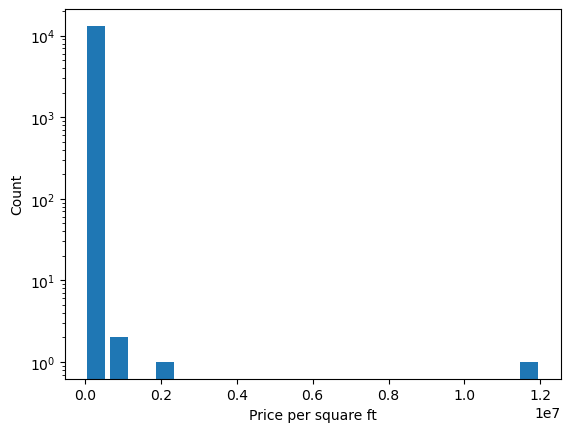

In [8]:
import matplotlib
from matplotlib import pyplot as plt
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

Above chart confirms our understanding that this dataset has some bad outliers. Because we see only one bar with more than 12000 data points but on the right hand side there are data points that have higher value for price per sqft but count of these data points is very tiny compared to 12000 hence we can hardly see any bar

Using log scale can make visualization little better

# Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

In [9]:
lower_percentile = df.price_per_sqft.quantile(0.001)
upper_percentile = df.price_per_sqft.quantile(0.999)
lower_percentile, upper_percentile

(1366.184, 50959.36200000098)

In [10]:
percentile = df[(df.price_per_sqft<lower_percentile) | (df.price_per_sqft>upper_percentile)]
percentile

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000


Above shows properties that has price_per_sqft value such as 500 rs which is very very low for the city of banglore. You would be very lucky if you can find such as property :) Also we have properties that has price per sqft value such as 12000000 which is way too high. It seems almost impossible and even if it is legitimate it can help data analysis process if we remove such a data point

In [11]:
percentile.shape

(28, 7)

In [12]:
#df_no_outlier
df2 = df[(df.price_per_sqft>lower_percentile) & (df.price_per_sqft<upper_percentile)]
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [13]:
df.shape

(13200, 7)

In [14]:
df.shape[0] - df2.shape[0]

28

We removed total 28 outliers

<Axes: xlabel='price_per_sqft', ylabel='Count'>

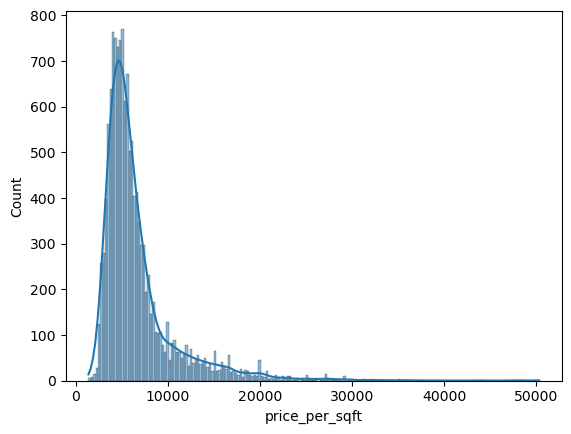

In [17]:
sn.histplot(df2.price_per_sqft, kde=True)

## Another method to clean dataset: On step(2) dataframe, use 4 standard deviation to remove outliers

In [18]:
upper_boundary = df2.price_per_sqft.mean() + 4 * df2.price_per_sqft.std()
lower_boundary = df2.price_per_sqft.mean() - 4 * df2.price_per_sqft.std()
upper_boundary, lower_boundary

(23227.73653589429, -9900.429065502549)

In [19]:
SD = df2[(df2.price_per_sqft<lower_boundary) | (df2.price_per_sqft>upper_boundary)]
SD.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
3752,other,4 Bedroom,1200.0,4.0,300.0,4,25000
4993,other,6 Bedroom,825.0,6.0,400.0,6,48484
2830,BTM 2nd Stage,4 Bedroom,1500.0,2.0,450.0,4,30000
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
3935,other,4 Bedroom,2360.0,4.0,600.0,4,25423
2371,other,5 Bedroom,3000.0,6.0,1000.0,5,33333
4119,other,4 Bedroom,7000.0,5.0,2050.0,4,29285
7110,BEML Layout,3 Bedroom,1200.0,5.0,325.0,3,27083
6597,other,2 BHK,1030.0,2.0,300.0,2,29126
6285,Malleshwaram,4 Bedroom,3000.0,5.0,815.0,4,27166


In [20]:
#df_no_outlier
df3 = df2[(df2.price_per_sqft>lower_boundary) & (df2.price_per_sqft<upper_boundary)]
df3.shape

(13047, 7)

In [21]:
df2.shape[0]-df3.shape[0]

125

In this step we removed total 125 outliers

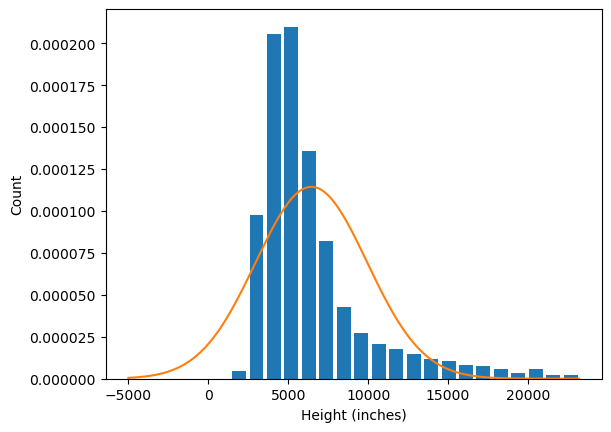

In [23]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

# use zscore of 4 to remove outliers

In [24]:
df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df.sample(10)

C:\Users\AJ Bukhari\AppData\Local\Temp\ipykernel_6628\3979779446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
2249,Talaghattapura,3 BHK,2254.0,3.0,170.00,3,7542
3969,Hoodi,8 Bedroom,1120.0,8.0,150.00,8,13392
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407
2627,Hormavu,2 BHK,1175.0,2.0,52.00,2,4425
5132,Gunjur,5 Bedroom,6613.0,7.0,950.00,5,14365
12775,Ramamurthy Nagar,2 BHK,960.0,2.0,35.00,2,3645
361,Chandapura,1 BHK,530.0,1.0,11.66,1,2200
6467,other,3 BHK,2010.0,3.0,125.00,3,6218
106,other,2 BHK,782.0,2.0,55.68,2,7120
10374,Electronic City,3 Bedroom,1400.0,3.0,90.00,3,6428


In [26]:
outliers_z = df2[(df2.zscore< -4) | (df2.zscore>4)]
outliers_z

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,7.150495
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,6.440283
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719,4.118633
760,other,9 Bedroom,600.0,9.0,190.0,9,31666,6.037725
...,...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000,6.842841
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000,9.016218


In [27]:
df4 = df2[(df2.zscore> -4) & (df2.zscore< +4)]
df4.shape

(13047, 8)

In [28]:
df2.shape[0] - df4.shape[0]

125

In [29]:
#In this step also we removed 125 outliers. The result would be exactly same as 4 standard deviation